# Annotation and Sentiment Analysis with TextBlob

**Initiate libraries:**

In [1]:
import pandas as pd
import nltk
from textblob import TextBlob

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /home/tz5b44/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tz5b44/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /home/tz5b44/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

**Read in data from file:**

In [4]:
df = pd.read_csv("../data/processed/20191209233601.19044.gkg.Labeled.txt", sep='\t', index_col=0)
df.Date = pd.to_datetime(df.Date, format="%Y%m%d")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4089 entries, 0 to 4088
Data columns (total 13 columns):
Date             4089 non-null datetime64[ns]
NumArticles      4089 non-null int64
Counts           586 non-null object
Themes           4001 non-null object
Locations        4089 non-null object
Persons          3578 non-null object
Organizations    3771 non-null object
ToneData         4089 non-null object
CAMEOEvents      2222 non-null object
Sources          4089 non-null object
SourceURLs       4089 non-null object
text             3478 non-null object
label            4089 non-null int64
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 447.2+ KB


**Annotate one record:**

In [6]:
blob = TextBlob(df['text'][3])

**Print out tags:**

In [7]:
blob.tags

[('WASHINGTON', 'NNP'),
 ('Reuters', 'NNP'),
 ('U.S.', 'NNP'),
 ('Transportation', 'NNP'),
 ('Secretary', 'NNP'),
 ('Elaine', 'NNP'),
 ('Chao', 'NNP'),
 ('said', 'VBD'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('that', 'IN'),
 ('regulators', 'NNS'),
 ('will', 'MD'),
 ('seek', 'VB'),
 ('public', 'JJ'),
 ('input', 'NN'),
 ('on', 'IN'),
 ('rules', 'NNS'),
 ('for', 'IN'),
 ('self-driving', 'JJ'),
 ('commercial', 'JJ'),
 ('vehicles', 'NNS'),
 ('and', 'CC'),
 ('trains', 'NNS'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('administration', 'NN'),
 ('grapples', 'VBZ'),
 ('with', 'IN'),
 ('how', 'WRB'),
 ('to', 'TO'),
 ('regulate', 'VB'),
 ('their', 'PRP$'),
 ('expected', 'JJ'),
 ('future', 'NN'),
 ('use', 'NN'),
 ('At', 'IN'),
 ('a', 'DT'),
 ('speech', 'NN'),
 ('in', 'IN'),
 ('Washington', 'NNP'),
 ('Chao', 'NNP'),
 ('said', 'VBD'),
 ('the', 'DT'),
 ('Federal', 'NNP'),
 ('Motor', 'NNP'),
 ('Carrier', 'NNP'),
 ('Safety', 'NNP'),
 ('Administration', 'NNP'),
 ('was', 'VBD'),
 ('asking', 'VBG'),
 ('for', 'IN')

**Print out noun phrases:**

In [8]:
blob.noun_phrases

WordList(['washington', 'reuters', 'u.s.', 'transportation secretary', 'elaine chao', 'public input', 'commercial vehicles', 'administration grapples', 'future use', 'washington', 'chao', 'federal motor', 'carrier safety', 'public comment', '“ facilitate', 'safe introduction', 'commercial motor vehicles ”', 'large trucks', 'federal railroad administration “', 'railroad industry. ” officials', 'impact ports', 'transportation issues', 'motors co', 'alphabet inc', 'car technologies', 'congress', 'legal barriers', 'chao', 'u.s.', 'national highway traffic', 'safety', 'nhtsa', 'donald trump', 'car guidelines', 'august', 'federal versus state role', 'derek kan', 'speed limits', 'driver behavior', 'alcohol consumption', 'federal government regulates vehicle performance', 'kan', 'federal policymakers', 'kan', 'congress', 'commercial trucks', 'september', 'chao', 'barack obama', 'safety standards', 'nhtsa', 'significant ” hurdles', 'transit', 'public input', 'autonomous bus technology', 'regula

**Print sentiment polarity for this example:**

In [9]:
for sentence in blob.sentences:
    print(sentence.sentiment.polarity, end = ", ")

-0.025, 0.17857142857142858, -0.0625, 0.15625, 0.0, 0.0, 0.1, 0.0, 0.0, -0.15, 0.0, 0.125, 0.3, 0.1875, 0.2, 0.05000000000000001, 0.1, 0.0, 0.1, 

**Print sentiment for entire document:**

In [10]:
blob.sentiment

Sentiment(polarity=0.08919172932330827, subjectivity=0.33847117794486214)

**Print sentiment polarity for entire document:**

In [11]:
blob.sentiment.polarity

0.08919172932330827

**Print sentiment subjectivity for entire document:**

In [12]:
blob.sentiment.subjectivity

0.33847117794486214

**Define functions to calculate polarity and subjectivity for input text:**

In [13]:
def TB_Polarity (text):
    text_ = str(text)[:500]
    try:
        tb_polarity = TextBlob(text_).sentiment.polarity
    except:
        tb_polarity = -200.0
    return tb_polarity

In [14]:
def TB_Subjectivity (text):
    text_ = str(text)[:500]
    try:
        tb_subjectivity = TextBlob(text_).sentiment.subjectivity
        tb_subjectivity
    except:
        tb_subjectivity = -200.0
    return tb_subjectivity

**Calculate polarity and subjectivity for all records:**

In [15]:
%time df['tb_polarity'] = df['text'].apply(TB_Polarity)

CPU times: user 2.78 s, sys: 15.6 ms, total: 2.8 s
Wall time: 2.86 s


In [16]:
df_tb_polarity01  = df[ (df.tb_polarity > -100) & ((df.label == 0) | (df.label == 1)) ]

In [17]:
bydatedf_tb_polarity01 = df_tb_polarity01.groupby(['Date']).mean()

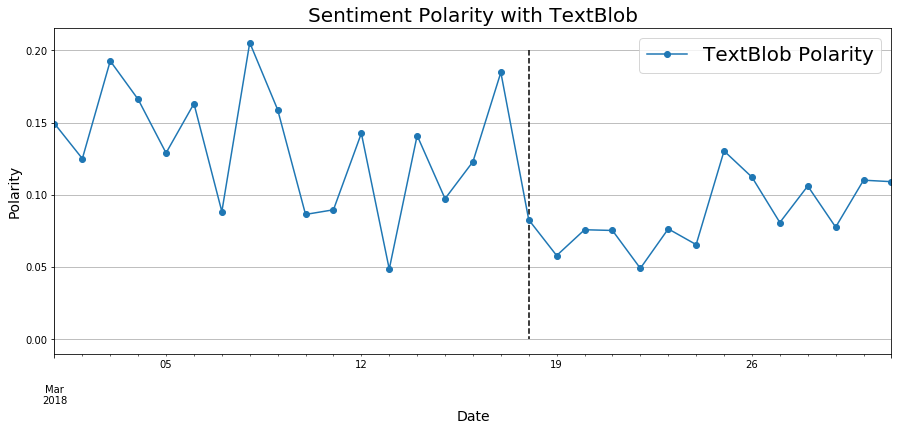

In [18]:
axe = bydatedf_tb_polarity01[['tb_polarity']].resample("1d").mean().plot(figsize=(15,6), marker='o')
axe.vlines(pd.Timestamp('2018-03-18'), 0.2, -0.0, linestyles='dashed', color='black')
axe.set_ylabel('Polarity', fontsize=14)
axe.set_xlabel('Date', fontsize=14)
axe.set_title('Sentiment Polarity with TextBlob', fontsize=20)
axe.legend(["TextBlob Polarity"], fontsize=20)
axe.grid()
plt.savefig("TB_Polarity_March2018.png")

In [19]:
df_tb_polarity01[ df_tb_polarity01['Date'] < pd.Timestamp('2018-03-18') ].shape

(491, 14)

In [20]:
df_tb_polarity01[ df_tb_polarity01['Date'] >= pd.Timestamp('2018-03-18') ].shape

(2048, 14)

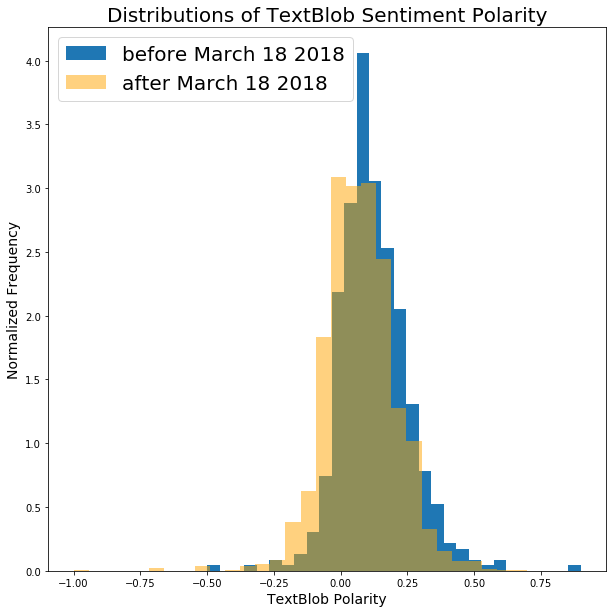

In [27]:
plt.hist(df_tb_polarity01[ df_tb_polarity01['Date'] < pd.Timestamp('2018-03-18') ]['tb_polarity'], bins=30, density=True)
plt.hist(df_tb_polarity01[ df_tb_polarity01['Date'] >= pd.Timestamp('2018-03-18') ]['tb_polarity'], bins=30, density=True, color="orange", alpha=0.5)
plt.xlabel('TextBlob Polarity', fontsize=14)
plt.ylabel('Normalized Frequency', fontsize=14)
plt.title('Distributions of TextBlob Sentiment Polarity',fontsize=20)
plt.legend(["before March 18 2018","after March 18 2018"],fontsize=20)
plt.savefig("TB_PolarityHist_March2018.png")
plt.show()

In [22]:
%time df['tb_subjectivity'] = df['text'].apply(TB_Subjectivity)

CPU times: user 2.52 s, sys: 0 ns, total: 2.52 s
Wall time: 2.55 s


In [23]:
df_tb_subjectivity = df[ (df.tb_subjectivity > -100) & ((df.label == 0) | (df.label == 1)) ]

In [24]:
bydatedf_tb_subjectivity=df_tb_subjectivity.groupby(['Date']).mean()

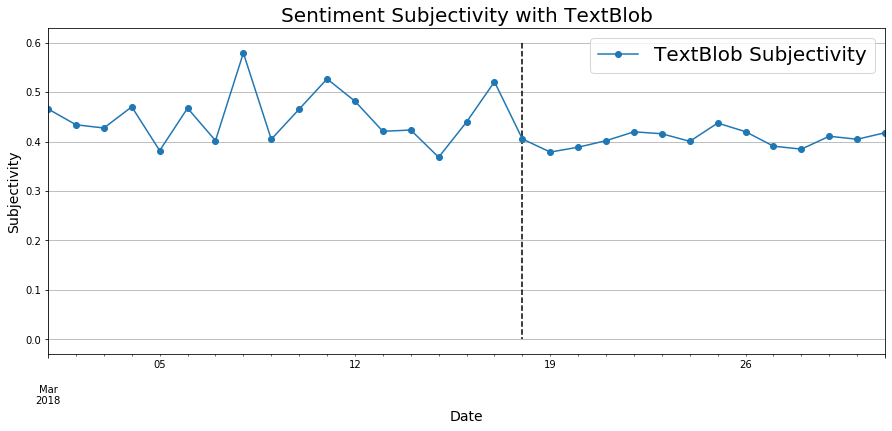

In [25]:
axe = bydatedf_tb_subjectivity[['tb_subjectivity']].resample("1d").median().plot(figsize=(15,6), marker='o')
axe.vlines(pd.Timestamp('2018-03-18'), 0.6, 0.0, linestyles='dashed', color='black')
axe.set_ylabel('Subjectivity', fontsize=14)
axe.set_xlabel('Date', fontsize=14)
axe.set_title('Sentiment Subjectivity with TextBlob', fontsize=20)
axe.legend(["TextBlob Subjectivity"], fontsize=20)
axe.grid()
plt.savefig("TB_Subjectivity_March2018.png")